## OpenCV 라이브러리 시작하기

OpenCV 라이브러리는 컴퓨터 비전 응용 프로그램을 지원하도록 설계되었습니다. 
우리는 이 과정 전반에 걸쳐 OpenCV를 광범위하게 사용할 것입니다. 

OpenCV 라이브러리를 사용하려면 다음과 같이 가져 오기가 필요합니다.

In [1]:
import cv2 # import OpenCV
from matplotlib import pyplot as plt # import matplotlib
import numpy as np # import numpy

numpy 배열은 픽셀 값을 저장하기 때문에 numpy를 import합니다.
Jupiter 노트북 자체에 이미지를 표시 할 수 있도록 matplotlib을 가져옵니다.

## 이미지로드 및 색상 공간 선택

cv2의 imread 함수를 사용하여 이미지를 로드하자.

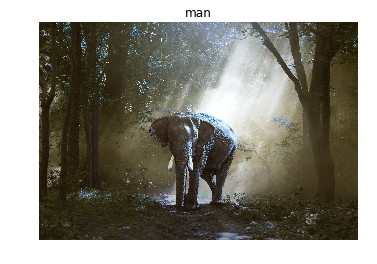

In [2]:
img = cv2.imread('Images/elephant.jpg')   #Load the image file into memory
plt.imshow(img)
plt.title('man')
plt.axis('off')
plt.show()

잘했습니다! 여러분은 화면에 첫 번째 사진을 불렀습니다!

## Task 1:  위의 코딩 블록을 사용하여 'Images'폴더에서 다른 이미지 파일을 엽니다. 그리고 이미지에 라벨을 붙이십시오!

이 튜토리얼의 대부분은 man.jpg 이미지를 사용합니다.

man.jpg 이미지를 다시 엽니다. 이 라이브러리를 사용하면 색상이 제대로 표현되지 않는 것을 알 수 있습니까? 왜 그럴까요?

OpenCV는 우리가 기대하는 RGB와 반대로 BGR의 이미지를 나타냅니다. 역순이기 때문에 이미지에서 파란색을 보게됩니다. BGR을 RGB로 변환 할 때 다음 코드를 사용합니다.

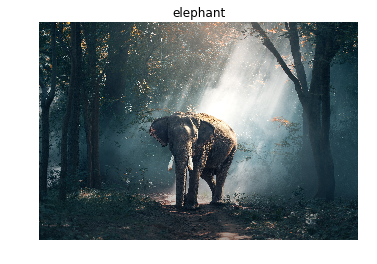

In [3]:
img = cv2.imread('Images/elephant.jpg')   #Load the image file into memory
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('elephant')
plt.axis('off')
plt.show()

잘했습니다! 여러분은 정확한 색상 표현을 하고 있습니다.! 다른 라이브러리에서 색상을 읽는 방법을 찾는 것이 얼마나 중요한지 알고 있습니까?

자, 이미지를 그레이 스케일 이미지로 읽어 봅시다! 

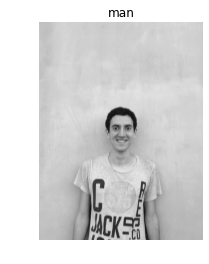

In [4]:
img = cv2.imread('Images/man.jpg',0) # the number zero opens the image as a grayscale image
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title('man')
plt.axis('off')
plt.show()

이미지를 성공적으로 회색 음영 이미지로 변환했습니다. 이미지가 숫자를 사용하여 어떻게 표현 될 수 있는지 기억하십니까?

## 이미지에 대한 정보 얻기

이제 우리는 우리의 이미지에 대해 더 많이 배우고 자합니다. 먼저, 우리가 가지고있는 이미지가 실제로 numpy 배열로 표시되는지 확인해 봅시다. 알아 내려면 도움말 (?) 기능을 사용하십시오.

In [5]:
img = cv2.imread('Images/man.jpg')
img?

당신이 본 '유형'은 무엇입니까? 실제로, ndarray!

우리가 가지고있는 이미지의 크기를 보자.

In [6]:
img = cv2.imread('Images/man.jpg')
print(img.shape)

(3967, 2977, 3)


표시된 숫자는 무엇을 의미합니까? 이것은 이미지의 높이가 3967 픽셀이고 폭이 2977 픽셀임을 의미합니다. 얼마나 많은 총 픽셀 수가 있습니까?

3은 무엇을 의미하나요? RGB 채널이 3개입니다.

In [7]:
img = cv2.imread('Images/man.jpg',0)
print(img.shape)

(3967, 2977)


대신 이미지를 회색 음영으로 열면 어떻게됩니까? 더 이상 채널값이 없음!

이제 이미지에 있는 최소 및 최대 픽셀 값을 봅시다.

In [8]:
img = cv2.imread('Images/man.jpg')
print (img.min())
print (img.max())

0
255


예상대로! 0에서 255까지

## 픽셀에 액세스하기

이제 우리는 픽셀에 액세스하여 특정 픽셀에서 RGB 값이 무엇인지 알아야합니다.
RGB 이미지를 사용하면 픽셀을 더 쉽게 인식 할 수 있습니다.

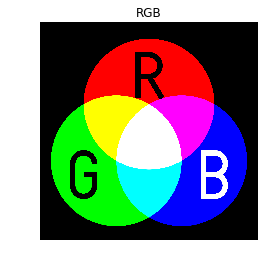

(2000, 2000, 3)
R=255, G=0, B=255


In [9]:
#  x = 500, y = 500에있는 RGB 픽셀에 액세스합니다.
#  OpenCV는 이미지를 RGB가 아닌 BGR 순서로 저장합니다.
# img = cv2.imread('Images/man.jpg')
img = cv2.imread('Images/rgb.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('RGB')
plt.show()
print(img.shape)
(B, G, R) = img[1000, 1500]
print('R={}, G={}, B={}'.format(R, G, B))

초록색과 파란색이 어디 있는지 알 수 있습니까?

## 색상 채널 분리

우리의 컬러 채널을 별도로 보자! 먼저 RGB 그림을 사용합니다!

데이터 획득을 위해 우리가 수행 한 서브플로트(subplots) 활동을 기억하십니까? 우리는 다시 여기에서 사용할 것입니다!

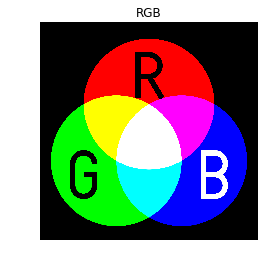

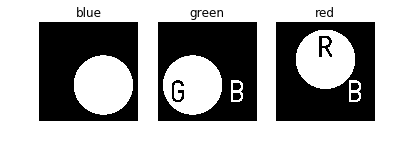

In [10]:
img = cv2.imread('Images/rgb.png')   #Load the image file into memory
#img = cv2.imread('Images/man.jpg') 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));plt.axis('off');plt.title('RGB')
#Split channel
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]
fig, bgr = plt.subplots(1,3)
bgr[0].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));bgr[0].axis('off');bgr[0].set_title('blue');
bgr[1].imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB));bgr[1].axis('off');bgr[1].set_title('green');
bgr[2].imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB));bgr[2].axis('off');bgr[2].set_title('red');

plt.show()

## Task 2: 위의 코딩 블록을 사용하여 man.jpg의 RGB 채널을 분할합니다. 서로 다른 채널의 강도에 대해 무엇을 배울 수 있습니까?

## 이미지 자르기

여러 번 이미지를 처리하고 관련이 없는 부분을 제거하거나 특정 영역 주위에 테두리 상자를 그리는 등 이미지의 특정 영역에 집중해야합니다. '관심 영역 (ROI)'.

결국 알고리즘을 사용하여 ROI를 자동으로 찾지만, 이번에는 수동으로 ROI를 추출해 봅시다!

이미지를 자르려고 노력합시다!

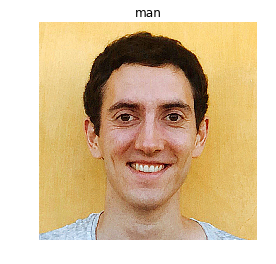

In [12]:
# 남자 얼굴에 초점을 맞춘 사각형 추출
# 현재 이미지 크기는 3967 x 2977입니다.
img = cv2.imread('Images/man.jpg')
roi = img[1500:2500, 1000:2000] # [y축값, x축값]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()

숫자를 추측하기가 어렵습니까? 축을 켜면 ROI (관심 영역)를 쉽게 찾을 수 있습니다. 경험 단계에서 OpenCV 기능을 사용하여 자동으로 ROI를 찾습니다!

위의 숫자를 변경하십시오! OpenCV의 좌표계가 정렬되는 방식에 대해 무엇을 말합니까? (0,0) 점은 어디에 있다고 생각합니까?

## 픽셀 값 변경하기

numpy 배열에 액세스 할 수 있게 되었으므로 픽셀 값을 변경할 수도 있습니다. 사진에서 남자의 얼굴을 '비울 수있는 방법'을 보겠습니다.

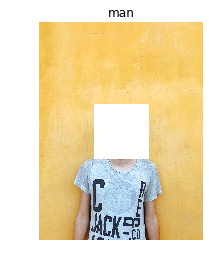

In [22]:
img = cv2.imread('Images/man.jpg')
img[1500:2500, 1000:2000] = [255,255,255] 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()

멋지지 않나요!

## Task 3: 위의 코딩 블록을 사용하여 상자 색상을 원하는 색상으로 변경하십시오!

이제 이미지의 일부를 복사하여 다른 곳에 배치하는 방법을 배우겠습니다.

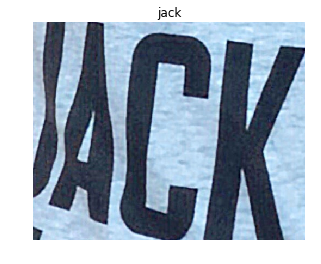

In [21]:
# 'JACK'이라는 단어에 중점을 둔 이미지의 일부를 추출합니다.
# 현재 이미지 크기는 3967 x 2977입니다.
img = cv2.imread('Images/man.jpg')
jack = img[3500:3900, 1000:1500]
plt.imshow(cv2.cvtColor(jack, cv2.COLOR_BGR2RGB))
plt.title('jack')
plt.axis('off')
plt.show()

자, 우리는 'JACK'을 다른 곳에 복사 할 것입니다.

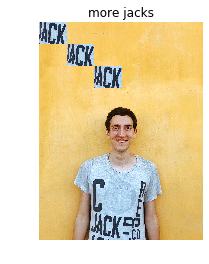

In [8]:
img = cv2.imread('Images/man.jpg')
jack = img[3500:3900, 1000:1500]
img[0:400,0:500]=img[400:800,500:1000]=img[800:1200,1000:1500]=jack

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('more jacks')
plt.axis('off')
plt.show()

## Task 4: 위의 코딩 블록을 사용하여 다른 한 가지를 복사하십시오 (여러분에게 달려 있습니다!).

## 이미지 크기 조정

이미지 크기를 조정하는 것이 중요합니다. 특히 모델을 교육 할 때 중요합니다. 모델을 연습 할 때 모든 이미지의 크기와 종횡비가 동일해야합니다.

이제 이미지 크기를 조정 해 봅시다!

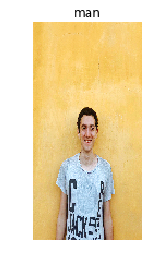

(200, 100, 3)


In [24]:
# 가로 세로 비율을 무시하고 이미지를 200x200px 크기로 조정
img = cv2.imread('Images/man.jpg')
resized = cv2.resize(img, (100, 200))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()
print(resized.shape)

이미지의 크기가 조정되지만 이미지가 명확하게 왜곡됩니다. 우리의 훈련 목적에 좋지 않습니다!

## 이미지 크기 조정, 가로 세로 비율 유지

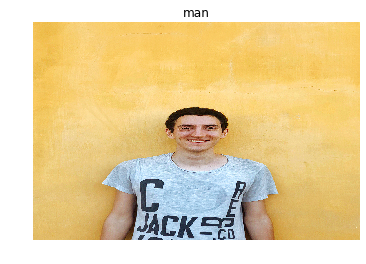

(991, 1488, 3)


In [25]:
# 고정 크기 조정 및 가로 세로 비율 왜곡 너비를 조정 필요.
# to be 300px but compute the new height based on the aspect ratio
# Remember, your current image size is 3967 x 2977
img = cv2.imread('Images/man.jpg')
resized=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()
print(resized.shape)

가로 세로 비율을 유지하면서 이미지의 크기를 조정합니다. 지금 저장하면 파일의 크기가 어느 정도 된다고 어떻게 생각합니까?

## 이미지 저장
imwrite 함수를 사용하여 이미지를 저장할 수 있습니다.

In [22]:
cv2.imwrite('original_man.jpg',img)
cv2.imwrite('resized_man.jpg',resized)

True

폴더를 살펴보십시오. 새 파일이 보이십니까? 파일들의 크기 비교해 보세요.

## Task 5: 이미지의 크기를 다시 조정하고 더 작게 만드십시오!

## 이미지 일괄 처리

우리는 한 번에 많은 이미지를 처리하여 추가 처리를 준비합니다. 우리는 어떻게 할 수 있습니까? 루프 기능을 사용하여 이미지를 반복하여 하나씩 처리 할 수 있습니다.

In [32]:
import cv2
import glob #일치하는 데이터 유형 추가 정보 : https://pymotw.com/2/glob/
import os

#디렉토리를 이미지 디렉토리로 변경하십시오.
path = os.getcwd()+ r'\Images' #os.getcwd ()는 현재 디렉토리로 이동합니다.
os.chdir(path)
    
# JPG 확장명을 가진 파일 목록 만들기
images = glob.glob('*.jpg')

#크기가 조정 된 폴더 만들기
folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

#Loop through the images
for image in images:
    #read images path (0 for grayscale, 1 for color)
    img=cv2.imread(image,0)
    
    #Create a variable to store the resized image 
    #shape[0] = width, shape[1] = height
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    
    #Check out that images in re has been resized
    cv2.imshow('Checking...',re)
    
    #Show result image for 0,5 sec on screen
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    
    #Write resized file
    cv2.imwrite(folder + '/' + 'resized_'+image, re)

#change directory to your working directory
path = r'C:\TestAI\Module 14 - Acquire (Computer Vision)' #파이썬 파일이 있는 현재 디렉토리 명으로 입력해주세요.
os.chdir(path)

폴더를 확인하십시오! 새 사진이 보입니까

OpenCV의 기본 사항을 배웠습니다.

우리는 경험 단계에서 더 많은 OpenCV를 사용할 것입니다!

# Exercises

### 1. Jupiter notebook에 flower.jpg 파일을 열고 표시하십시오.

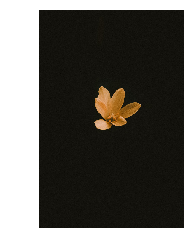

In [31]:
img = cv2.imread('Images/flower.jpg')   #Load the image file into memory
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 2. 이미지의 크기는 얼마입니까?

In [39]:
print(img.shape)
img.shape

(5655, 3770, 3)


(5655, 3770, 3)

### 3. 꽃을 정사각형으로 자르기

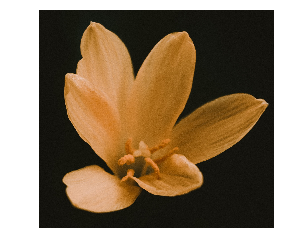

(1300, 1400, 3)

In [54]:
img = cv2.imread('Images/flower.jpg')   
squre=img[1900:3200,1300:2700]
plt.imshow(cv2.cvtColor(squre, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
squre.shape

### 4. 이미지에 꽃을 복사하십시오 (적어도 3 개 이상).

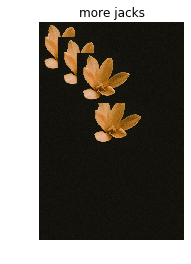

In [71]:
img = cv2.imread('Images/flower.jpg')
img.shape

jack = img[1900:3200,1300:2700]
jack.shape

plt.imshow(cv2.cvtColor(jack, cv2.COLOR_BGR2RGB))

img[0:1300,0:1400]=img[400:1700,500:1900]=img[800:2100,1000:2400]=jack

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('more jacks')
plt.axis('off')
plt.show()



### 5. 적어도 하나의 꽃 크기 조정

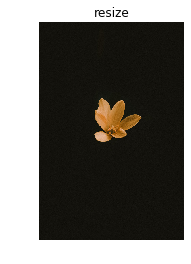

(1413, 942, 3)


In [73]:
img = cv2.imread('Images/flower.jpg')
resized=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('resize')
plt.axis('off')
plt.show()
print(resized.shape)

### 6. 새로운 이미지 저장!

In [74]:
cv2.imwrite('original_man.jpg',img)
cv2.imwrite('resized_man.jpg',resized)

True

### 7. 파일 크기가 최대 40KB 인 'Images'폴더의 이미지를 동일한 크기의 사각형으로 잘라내면서 일괄 처리를 수행하십시오!

In [75]:
import cv2
import glob #일치하는 데이터 유형 추가 정보 : https://pymotw.com/2/glob/
import os

#디렉토리를 이미지 디렉토리로 변경하십시오.
path = os.getcwd()+ r'\Images' #os.getcwd ()는 현재 디렉토리로 이동합니다.
os.chdir(path)
    
# JPG 확장명을 가진 파일 목록 만들기
images = glob.glob('*.jpg')

#크기가 조정 된 폴더 만들기
folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

#Loop through the images
for image in images:
    #read images path (0 for grayscale, 1 for color)
    img=cv2.imread(image,0)
    
    #Create a variable to store the resized image 
    #shape[0] = width, shape[1] = height
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    
    #Check out that images in re has been resized
    cv2.imshow('Checking...',re)
    
    #Show result image for 0,5 sec on screen
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    
    #Write resized file
    cv2.imwrite(folder + '/' + 'resized_'+image, re)

#change directory to your working directory
path = r'C:\testAI\john_19.5.24\[14Youths]' #파이썬 파일이 있는 현재 디렉토리 명으로 입력해주세요.
os.chdir(path)

무엇을 주의 해야하는가? 우리가 원하는 정보를 잃어 버릴만큼 이미지 중 일부가 잘리는 것을 보시겠습니까? 컴퓨터를 사용하여 관심 분야를 결정하는 데 도움이되는 방법은 무엇입니까?

우리는 다음 노트북에서 더 많은 것을 발견 할 것입니다!